# LABORATORIO 3: Test statistici


a.a. 2024/2025, 20/03/2025

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

**Test statisici**

Utilizziamo la tabella integrate_titles che abbiamo prodotto durante il primo laboratorio. Vi ricordo che abbiamo effettuato integrazione di due dataset provenienti da Disney+ e Netflix, contenenti informazioni circa film e serie tv rilasciate sulle due piattaforme di streaming.
Il dataset integrato è stato pulito e risulta quindi pronto per ulteriori analisi.

1. Importiamo il dataset:

In [2]:
#codice qui
integrate_titles = pd.read_csv("integrate_titles_3.csv")

visualizziamo il dataset

In [3]:
#codice qui
integrate_titles.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,title,type,release_year,age_certification,runtime,genres,...,director,country,date_added,rating,duration,year,month,day,imdb_score_quant,release_year_quant
0,1,1,1,tm82169,Rocky,MOVIE,1976,PG,119,"['drama', 'sport']",...,John G. Avildsen,United States,2019-08-01,PG,120 min,2019.0,8.0,1.0,EXCELLENT,VERY OLD
1,2,2,2,tm17823,Grease,MOVIE,1978,PG,110,"['comedy', 'romance']",...,Randal Kleiser,United States,2019-11-01,PG,110 min,2019.0,11.0,1.0,VERY GOOD,VERY OLD
2,3,3,3,tm69975,Rocky II,MOVIE,1979,PG,119,"['drama', 'sport']",...,Sylvester Stallone,United States,2019-08-01,PG,119 min,2019.0,8.0,1.0,VERY GOOD,VERY OLD
3,4,4,4,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'comedy']",...,"Terry Gilliam, Terry Jones",United Kingdom,2019-01-02,PG,92 min,2019.0,1.0,2.0,EXCELLENT,VERY OLD
4,5,5,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",...,NaN,United Kingdom,2018-10-02,TV-14,4 Seasons,2018.0,10.0,2.0,EXCELLENT,VERY OLD


In [4]:
#codice qui per vedere numero di elementi e informazioni sulle colonne
integrate_titles.shape
integrate_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.2          4170 non-null   int64  
 1   Unnamed: 0.1          4170 non-null   int64  
 2   Unnamed: 0            4170 non-null   int64  
 3   id                    4170 non-null   object 
 4   title                 4170 non-null   object 
 5   type                  4170 non-null   object 
 6   release_year          4170 non-null   int64  
 7   age_certification     2593 non-null   object 
 8   runtime               4170 non-null   int64  
 9   genres                4170 non-null   object 
 10  production_countries  4170 non-null   object 
 11  seasons               1588 non-null   float64
 12  imdb_id               4170 non-null   object 
 13  imdb_score            4170 non-null   float64
 14  imdb_votes            4165 non-null   float64
 15  tmdb_popularity      

**Parte 1. Usiamo la visualizzazione per farci delle idee**

Visualizziamo i valori di imdb_score, separati per type, utilizzando dei box plot.

prima di tutto verifichiamo che non ci siano valori nulli, come fatto la scorsa volta, ed eliminiamo le righe che dove imbd_score è nullo.

<Axes: title={'center': 'imdb_score'}, xlabel='type'>

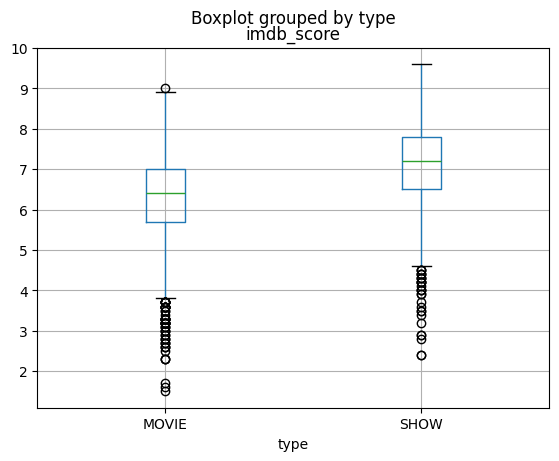

In [5]:
integrate_titles.boxplot(column = 'imdb_score',by='type')


In [6]:
#codice per eliminare i valori nulli
integrate_titles = integrate_titles.dropna(axis=0, subset=['imdb_score'])

stessa cosa per tmdb

In [7]:
integrate_titles = integrate_titles.dropna(axis=0, subset=['tmdb_score'])


visualizziamo quindi, quanto richiesto

Text(0.5, 1.0, 'box plot per tipo')

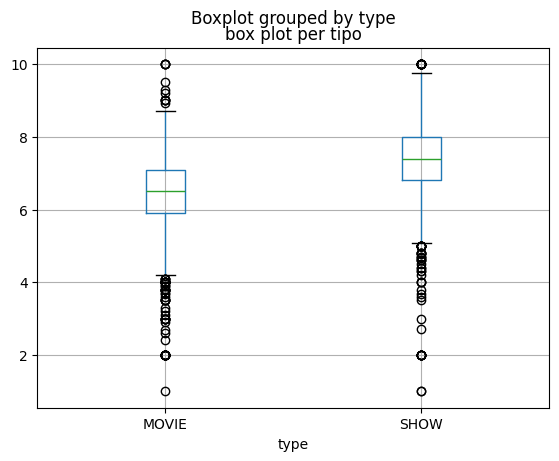

In [8]:
#codice qui
integrate_titles.boxplot(column='tmdb_score', by='type')
plt.title('box plot per tipo')

sembrerebbe che i due box plots si sovrappongano, ma che, in generale, la mediana della valutazione per le serie sia maggiore rispetto ai movie.
Ripetiamo ora la stessa cosa per tmdb_score

Text(0.5, 1.0, 'box plot per tipo')

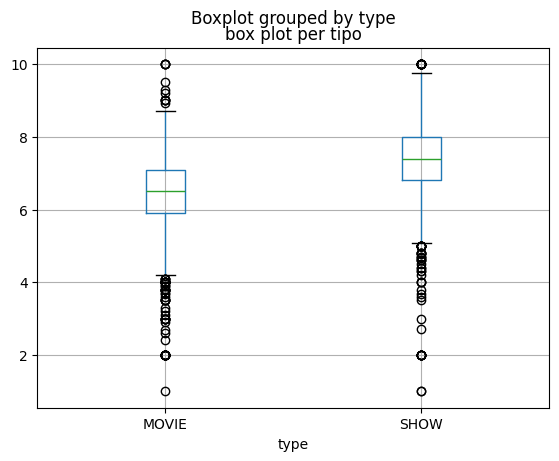

In [9]:
#codice qui
integrate_titles.boxplot(column='tmdb_score', by='type')
plt.title('box plot per tipo')

troviamo un andamento simile per il tmdb_score.
A questo punto ci chiediamo, questa differenza è statisticamente significativa? come possiamo fare per dimostrarlo?

Possiamo utilizzare un test statistico. Proviamo con un t-test.

Sappiamo che si devono verificare alcune ipotesi:
1. Campione con numero di elementi n > 30;
2. Popolazione N almeno dieci volte superiore al campione N > 10*n.

Prima di tutto, stampiamo il numero di elementi per le due classi (SHOW e MOVIE)

In [10]:
print(np.sum(integrate_titles['type']=='SHOW'))
print(np.sum(integrate_titles['type']=='MOVIE'))
print(integrate_titles.shape)

1543
2525
(4068, 27)


le ipotesi sono verificate, quindi possiamo applicare un t-test.

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95).

ipotesi nulla

H0 = le media di imdb_score di SHOW e MOVIE non sono statisticamente diverse;

ipotesi alternativa

HA = le medie sono diverse.


significatività = 0.05

In [11]:
t_statistic, p_value = stats.ttest_1samp(a= integrate_titles['imdb_score'][integrate_titles['type']=='SHOW'], popmean= integrate_titles['imdb_score'][integrate_titles['type']=='MOVIE'].mean())
print(p_value)
print(t_statistic)

9.232488447371132e-156
29.95384401598996


che cosa deduciamo da questo?

siccome il p-value << significatività; deduciamo che possiamo rigettare l'ipotesi nulla in favore di quella alternativa.

verifichiamo ora che la media dello score dei film sia più bassa rispetto a quella degli show. Dobbiamo usare il t-test ad una coda. Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95).

ipotesi nulla

H0 = la media di imdb_score dei film è inferiore rispetto a quella degli show.

ipotesi alternativa

HA = la media di imdb_score è maggiore o uguale rispetto a quella degli show.


significatività = 0.05

In [12]:
t_statistic, p_value = stats.ttest_1samp(a= integrate_titles['imdb_score'][integrate_titles['type']=='SHOW'], popmean= integrate_titles['imdb_score'][integrate_titles['type']=='MOVIE'].mean(),alternative='less')
print(p_value)
print(t_statistic)

1.0
29.95384401598996


e facciamo anche un'ultima prova come sanity check, verificando l'alternativa rimasta.

In [13]:
t_statistic, p_value = stats.ttest_1samp(a= integrate_titles['imdb_score'][integrate_titles['type']=='SHOW'], popmean= integrate_titles['imdb_score'][integrate_titles['type']=='MOVIE'].mean(),alternative='greater')
print(p_value)
print(t_statistic)

4.616244223685566e-156
29.95384401598996


ripetete quanto appena fatto per lo score di tmdb (applicate l'ipotesi che ritenete più corretta, usando i box plots per avere l'idea precisa).

In [14]:
t_statistic, p_value = stats.ttest_1samp(a= integrate_titles['tmdb_score'][integrate_titles['type']=='SHOW'], popmean= integrate_titles['tmdb_score'][integrate_titles['type']=='MOVIE'].mean(),alternative='greater')
print(p_value)
print(t_statistic)

3.271145405062244e-176
32.3784481690246


adesso approfondiamo la nostra analisi, prima di tutto visualizzando lo score dei film vecchi (prima del 2010) e recenti (post 2010).
Innanzitutto, creiamo una nuova colonna che ci dica se il film è vecchio o nuovo, secondo questa classificazione. Potremmo mettere 1 se è vecchio e 0 altrimenti.

In [15]:
integrate_titles['old'] = (integrate_titles['release_year']>=2010).astype(int)

stampiamo il risultato

In [16]:
integrate_titles['old'].tolist()[0:50]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

quindi visualizziamo con box plot

Text(0.5, 1.0, 'box plot per tipo')

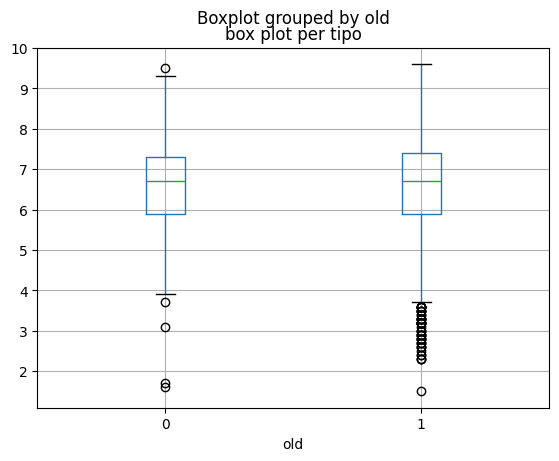

In [17]:
integrate_titles.boxplot(column='imdb_score', by='old')
plt.title('box plot per tipo')

vi sembra che ci sia una differenza statistica tra le due classi che abbiamo creato?
utilizziamo un t-test. Ripetiamo le verifiche necessarie, e poi eseguiamo il t-test.

Scegliamo un livello di significatività di 0.05 (intervallo di confidenza di 0.95).

ipotesi nulla

H0 = le media di imdb_score dei film old e recenti non sono statisticamente diverse

ipotesi alternativa

HA = le medie sono diverse.


significatività = 0.05

In [18]:
print(np.sum(integrate_titles['old']==1))
print(np.sum(integrate_titles['old']==0))
print(integrate_titles.shape)
t_statistic, p_value = stats.ttest_1samp(a= integrate_titles['imdb_score'][integrate_titles['old']==1], popmean= integrate_titles['imdb_score'][integrate_titles['old']==0].mean())
print(p_value)
print(t_statistic)

3419
649
(4068, 28)
0.09467106981031759
-1.6717200660027884


Deducete voi i risultati di questo t-test, e ditemi se vi torna il risultato.



A questo punto, utilizziamo le colonne  quantize_imdb_score e quantize_release_year che abbiamo prodotto durante lo scorso laboratorio.
Recuperiamo la rappresentazione OLAP, e visualizziamo il numero di MOVIE, con uno slicing, concentrandoci su quantize_imdb_score.


In [19]:
quantize_imdb_score = ['LOW','SUFFICIENT','GOOD','VERY GOOD','EXCELLENT']
quantize_release_year = ['VERY OLD','OLD','RECENT','VERY RECENT']
quantize_type = ['MOVIE','SHOW']
OLAP = np.zeros((5,4,2))
for z in range(0,len(quantize_type)):
  Awards_prog_z = integrate_titles[integrate_titles['type']==quantize_type[z]]
  for j in range(0,len(quantize_release_year)):
    for i in range(0,len(quantize_imdb_score)):
      OLAP[i,j,z] = np.sum((Awards_prog_z['imdb_score_quant'] == quantize_imdb_score[i]) &(Awards_prog_z['release_year_quant'] == quantize_release_year[j]))

facciamo un dicing, concentrandoci su MOVIE e film RECENT.

In [20]:
scores_movies_recent = OLAP[:,3,0]
print(scores_movies_recent)

[179. 430. 668. 388.  41.]


Utilizzando altri servizi di streaming, otteniamo una versione analoga delle colonne quantizzate, relative ai soli film recenti (gli stessi del nostro dataset), di questo tipo:

In [21]:
imdb_score_altri_servizi = [180,410,700,370,46]

vogliamo capire se i conteggi estratti dalle due diverse sorgenti (netflix e disney+ e altre due) appartengono alla stessa distribuzione.
Possiamo farlo applicando un test chi-quadrato.

Usiamo un Chi-quadrato per l'idoneita'. Condizioni.

Abbiamo almeno 5 conteggi? SI;
Le singole osservazioni sono indipendenti e le dimensioni della popolazione devono essere pari ad almeno 10 volte quelle del campione (10n < N). Verificata, abbiamo oltre 4000 film soltanto nel dataset Netflix e Disney+.

In [22]:
chi_squared, p_value = stats.chisquare(f_obs= scores_movies_recent, f_exp= imdb_score_altri_servizi)

print(chi_squared)
print(p_value)

3.8631763910555
0.4248394810290381


interpretiamo i risultati del test:

i gradi di libertà sono n = (numero di colonne -1) = 5 - 1 = 4.

scegliamo un intervallo di confidenza di 0.95.

Prendendo la tabella del chi-quadrato, notiamo che il valore critico del Chi quadrato è 9.488, quindi il valore ottenuto è < del valore critico.

Deduciamo allora che non possiamo rigettare l'ipotesi nulla, secondo cui gli indici imbd_score relativi ai due servizi di streaming seguono la stessa distribuzione.


Dagli stessi servizi di streaming alternativi a Netflix e Disney plus, troviamo che i film con gradimento low, hanno la seguente distribuzione in termini di anno di rilascio:

In [23]:
#codice qui
release_year_altri_servizi_old_movies = [20,42,250,299]


verificate se i conteggi estratti dalle due sorgenti seguono la stessa distribuzione.

**tip** calcoliamo prima il numero di gradi di libertà, poi confrontiamo, al solito, il valore del chi-quadrato ottenuto con il valore estratto dalla tabella del chi-quadrato.

In [24]:
#dicing su MOVIES e OLD
release_year_movies_old = OLAP[1,:,0]
print(release_year_movies_old)
#test chi-quadrato idoneità
chi_squared, p_value = stats.chisquare(f_obs= release_year_movies_old, f_exp= release_year_altri_servizi_old_movies)
print(chi_squared)
print(p_value)



[ 19.  41. 121. 430.]
124.03245835324097
1.0443875410416129e-26


commentate con le opportune conclusioni.